In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
agender_files = {
    "cFlow": "../../experiments/finn/celeba_xy_y_on_recons_age_gender.csv",
    "cVAE": "../../experiments/vae/celeba_xy_y_on_recons_agender.csv",
    "CNN": "../../experiments/baseline/celeba_naive_baseline_Male Young_Smiling_40epochs.csv",
    "Ln2L": "../../experiments/ln2l/celeba_ln2l_Smiling_0.01ew_40epochs_hair_color_more_eval.csv",
}
hair_files = {
    "cFlow": "../../experiments/finn/celeba_xy_y_on_recons_hair_color.csv",
    "cVAE": "../../experiments/vae/celeba_xy_y_on_recons_hair_color.csv",
    "CNN": "../../experiments/baseline/celeba_naive_baseline_Black_Hair Blond_Hair Brown_Hair_Smiling_40epochs.csv",
    "Ln2L": "../../experiments/ln2l/celeba_ln2l_Smiling_0.01ew_40epochs_agender_more_eval.csv",
}

In [3]:
def read(file_dict):
    df = pd.DataFrame()
    for method, fname in file_dict.items():
        data = pd.read_csv(fname)
        data["method"] = method
        df = pd.concat([df, data], axis="index", sort=False, ignore_index=True)
    return df

In [4]:
agender = read(agender_files)
hair = read(hair_files)

In [5]:
agender[["method", "Mix_fact", "Accuracy", "Renyi preds and s"]].query("Mix_fact == 0")#.groupby("method").agg(["mean", "std"])

,method,Mix_fact,Accuracy,Renyi preds and s
0,cFlow,0.0,0.833539,0.081829
2,cVAE,0.0,0.832823,0.068705
4,CNN,0.0,0.862340,0.156297
6,Ln2L,0.0,0.489853,1.000000


In [6]:
agender[["method", "Mix_fact", "Accuracy", "Renyi preds and s"]].query("Mix_fact == 1")

,method,Mix_fact,Accuracy,Renyi preds and s
1,cFlow,1.0,0.826086,0.264788
3,cVAE,1.0,0.824186,0.145135
5,CNN,1.0,0.824260,0.366942
7,Ln2L,1.0,0.489853,1.000000


In [7]:
hair[["method", "Mix_fact", "Accuracy", "Renyi preds and s"]].query("Mix_fact == 0")#.groupby("method").agg(["mean", "std"])

,method,Mix_fact,Accuracy,Renyi preds and s
0,cFlow,0.0,0.830370,0.138989
2,cVAE,0.0,0.827595,0.041260
4,CNN,0.0,0.685977,0.524664
6,Ln2L,0.0,0.521520,1.000000


In [8]:
hair[["method", "Mix_fact", "Accuracy", "Renyi preds and s"]].query("Mix_fact == 1")

,method,Mix_fact,Accuracy,Renyi preds and s
1,cFlow,1.0,0.826685,0.181032
3,cVAE,1.0,0.813069,0.149924
5,CNN,1.0,0.709002,0.601349
7,Ln2L,1.0,0.521520,1.000000


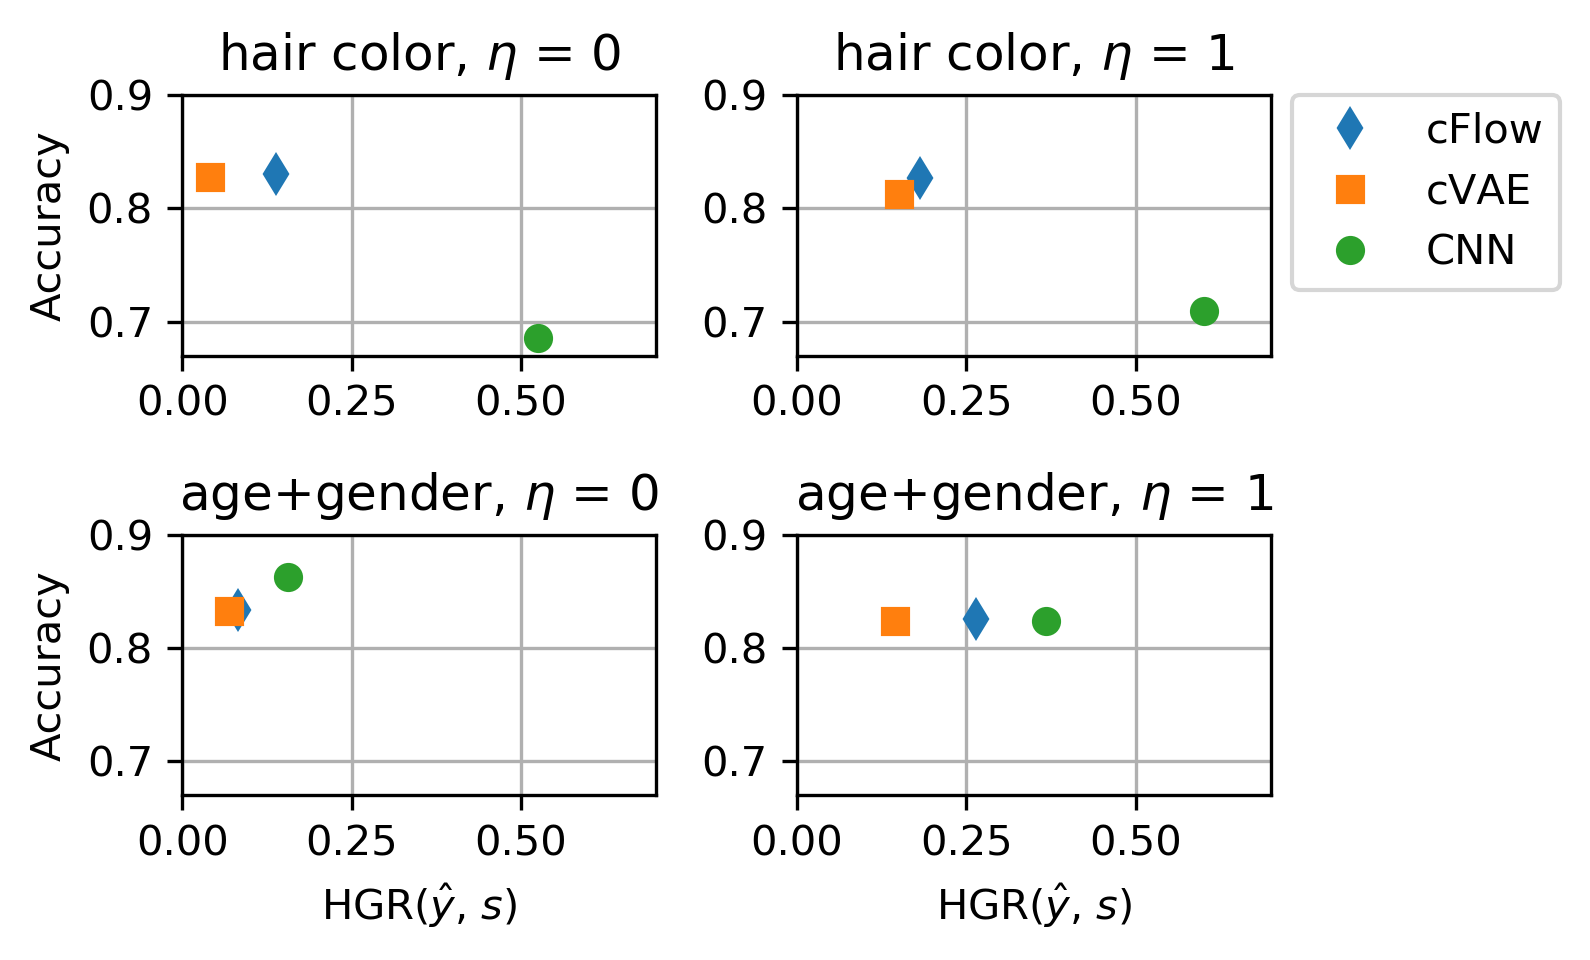

In [32]:
to_plot = {"hair": hair, "agender": agender}
fig, plots = plt.subplots(nrows=2, ncols=2, figsize=(5.4, 3.3), dpi=300, facecolor="white")
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, (datat, mix_fact)) in enumerate(zip(flat_plots, [("hair", 0), ("hair", 1), ("agender", 0), ("agender", 1)])):
    for method, shape in zip(("cFlow", "cVAE", "CNN" #,"Ln2L"
                             ), ("d", "s", "o", "x")):
        data = to_plot[datat].query(f"Mix_fact == \"{mix_fact}\" & method == \"{method}\"")
        plot.plot(data["Renyi preds and s"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        title = "hair color" if datat == "hair" else "age+gender"
        plot.set_title(f"{title}, $\\eta$ = {mix_fact}")
    plot.grid(True)
#     plot.set_xlim((0, 1))
    plot.set_xlim((0, 0.7))
    plot.set_ylim((0.67, 0.9))
    if i == 1:
        plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.08))
    if i in (2, 3):
#         plot.set_xlabel(r"$P(\hat{Y}=1|S=0)/P(\hat{Y}=1|S=1)$")
        plot.set_xlabel("HGR($\\hat{y}$, $s$)")
    if i in (0, 2):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("celeba_multi_s.pdf", bbox_inches='tight', pad_inches=0)